In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
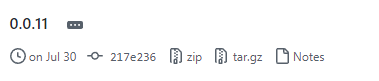

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.12dev'

In [4]:
# Add the path with your spectra in
mypath=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\BenBlack'

In [5]:
filetype='head_csv'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.csv'
# If your instrument appends a nubmer like 01, 02 to each file, True removes it
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [6]:
Diad_files=pf.get_diad_files(path=mypath, file_ext=file_ext, exclude_str='Ne')
Diad_files

exclude type
.png


['007_k9.csv']

## Select the first file you want to fit
- We suggest fitting one by one, e.g. running back up to here, because you should be inspecting every fit

In [7]:
filename=Diad_files[0] # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
print(filename)

007_k9.csv


## First we plot the spectra
- This lets you look at the spectra, decide how strong your hotbands are, and see how elevated the diads are (if they are very elevated, you may need to fit a gaussian background too)

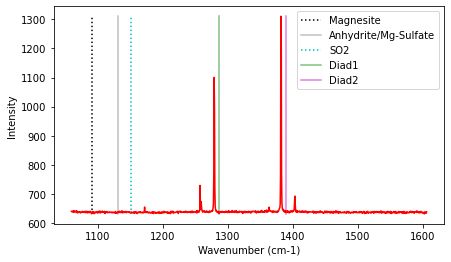

In [8]:
pf.plot_diad(path=mypath, filename=filename, filetype=filetype)

## After inspecting the spectra, decide if you want to fit the carbonate peak
- If yes, select fit_carbonate=True, else fit_Carbonate=False
- We can see above there is no carbonate, so we select false

In [9]:
fit_carbonate=False

# Exclude a range here, e.g. if you have a nasty Cosmic ray
exclude_range=None#[1080, 1088]

# This selects the two background positions
lower_range=[1060, 1065]
upper_range=[1120, 1130]

# This sets the peak center, you can tweak if needed
cent=1090
# Amplitude, may need to tweak
amplitude=1000
# Tweak degree of poylnomial fitting the background
N_poly=1
# Select sigma level, e.g. discard points in background N* sigma outside mean
outlier_sigma=12
# N PEAKS - if you want approx peak positionYs
N_peaks=3

# This actually does the work and fits the carbonate peak
# You can tweak the other parameters such as the distance, prominence in the function
Carb_fit=pf.fit_carbonate_peak(path=mypath, 
filename=filename, filetype=filetype,
lower_range=lower_range, upper_range=upper_range, 
cent=cent, exclude_range=exclude_range,
N_poly=N_poly, outlier_sigma=outlier_sigma, 
N_peaks=N_peaks, amplitude=amplitude,
distance = 10, prominence=5, width=6, 
threshold=0.1, fit_carbonate=fit_carbonate)
Carb_fit

## Now lets plot the diads
- As with carbonate, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

Initial estimates: Diad1+HB=[1278.8 1257.1], Diad2+HB=[1381.6 1403.3]


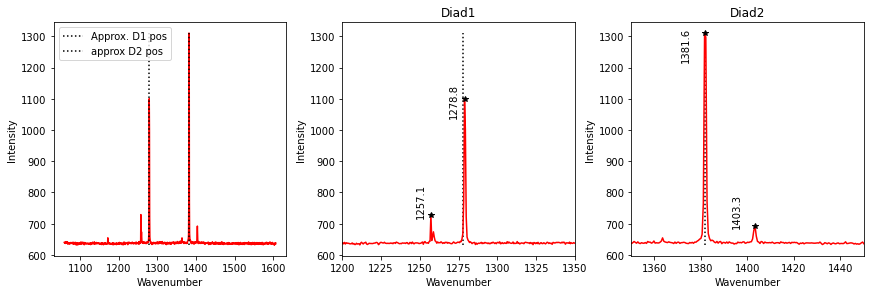

In [10]:
# Exclude a range
exclude_range1=None #[1320, 1340]#None
exclude_range2=None #[1236, 1250]
# Specify the number of peaks
n_peaks_diad1=2 #  I have choosen 1, as you have a nasty noise peak on your hotband
n_peaks_diad2=2 
# Depending on your Ne line correction, your diads will be in a different bit of the spectra 
# You can adjust this after running the function once, as it will label your peaks
approx_diad2_pos=[1379, 1385]
approx_diad1_pos=[1275, 1280]
    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(path=mypath, filename=filename,
filetype=filetype, approx_diad2_pos=approx_diad2_pos, approx_diad1_pos=approx_diad1_pos,
n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2,                                      
exclude_range1=exclude_range1,  exclude_range2=exclude_range2,
height = 400, threshold = 0.5, distance = 5, prominence=10, width=0.5)

## If you have no diads visible...
- Uncomment this line, and it will just save the carbonate peak parameters

In [11]:
#pf.proceed_to_fit_diads(filename, Carb_fit)

## Fit Diad 1
- This function uses the guess of the peak parameters above. You can choose to fit a gaussian background. Else, use a polynomial and specify background positions
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

,Diad1_Cent,Diad1_Area,HB1_Cent,HB1_Area,Residual_Diad1
0,1278.990401,670.918033,1257.141883,65.839297,2.382435


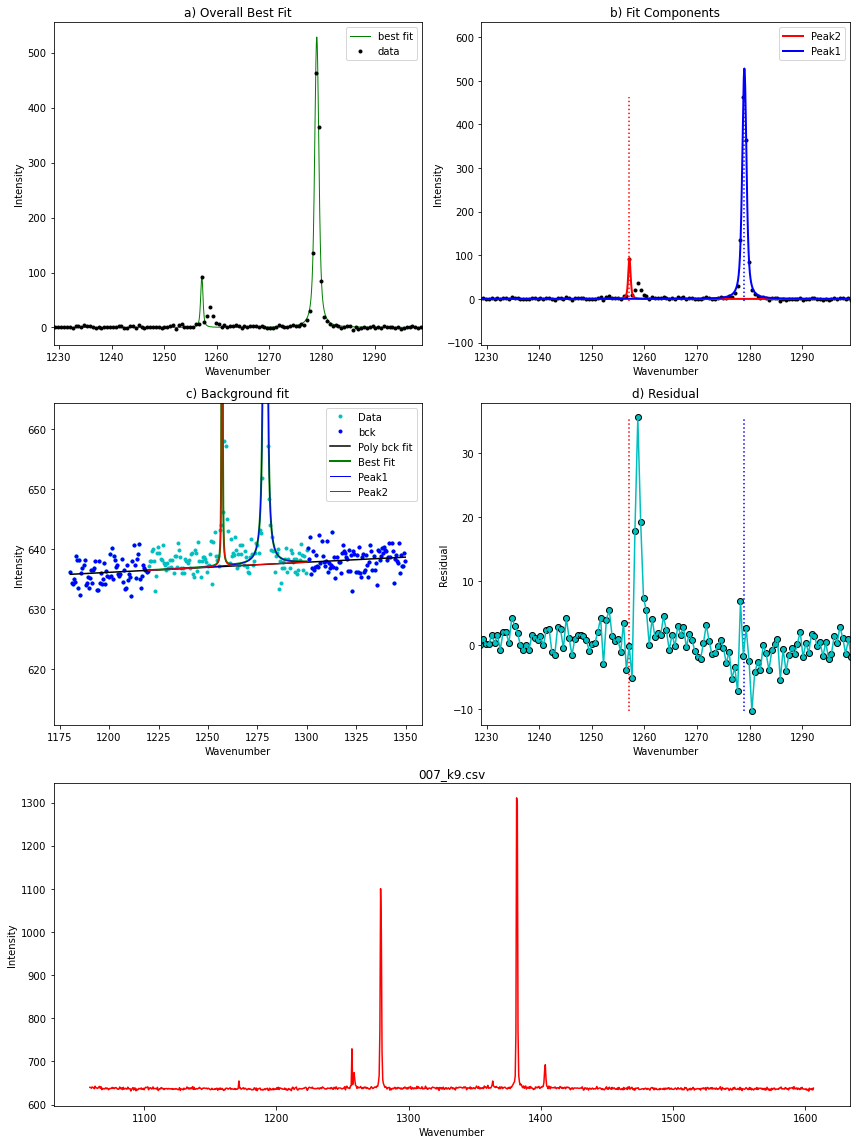

In [12]:
# For very dense spectra, with a very elevated background, you'll need to add a gaussian fit
# If you put a number in brackets, it'll center a gaussian extra background near there. 
peak_pos_gauss=None #(1250)
# Degree of polynomial for the background
N_poly_bck_diad1=1
# LH range to use as baseline for the diad
lower_baseline_diad1=[1180, 1220]
# RH range to use as baseline for the diad
upper_baseline_diad1=[1300, 1350]
## Amplitude may need tweaking if you don't get a good match
amplitude=100
# Do you want to save the figure?
plot_figure=True
# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(
path=mypath, filename=filename, filetype=filetype,
exclude_range1=exclude_range1, exclude_range2=exclude_range2,
N_poly_bck_diad1=N_poly_bck_diad1, lower_baseline_diad1=lower_baseline_diad1,
upper_baseline_diad1=upper_baseline_diad1,
peak_pos_voigt=diad1_peaks, peak_pos_gauss=peak_pos_gauss, amplitude=amplitude,
plot_figure=plot_figure)
Diad1_fit

## Fit diad 2

1381.8958379245528
<Parameter 'sigma', value=0.2171694940367095 +/- 0.00344, bounds=[0:inf]>
made df
G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\BenBlack


,Diad2_Cent,Diad2_Area,HB2_Cent,HB2_Area,Residual_Diad2
0,1381.895839,969.866176,1403.183546,83.068795,1.779601


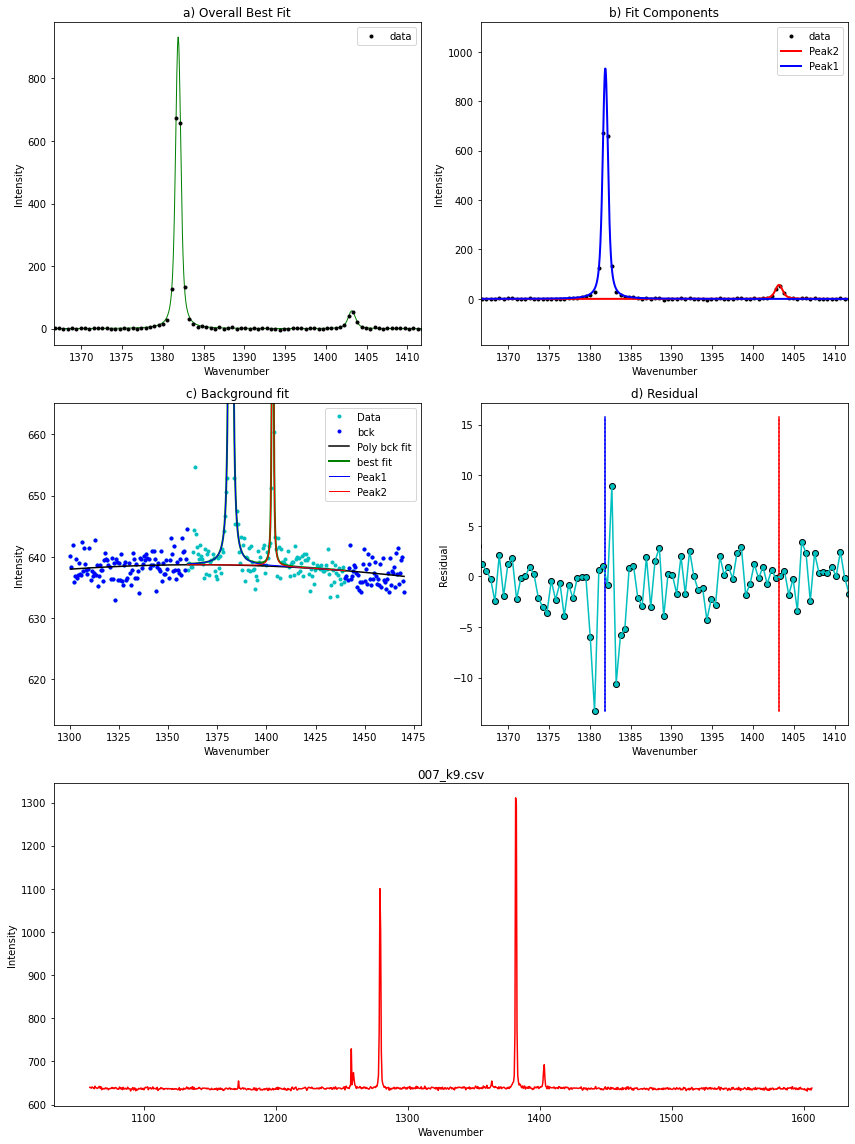

In [13]:
# Gaussian or not, either enter approximate center of Guassian, or None
peak_pos_gauss=None#(1378)
# If need to adjust shape of gaussian, enter fwhm here
gauss_sigma=100
gauss_sigma_min=10
gauss_amp=30000
# Degree of polynomail for the background
N_poly_bck_diad2=2
# LH range to use as baseline for the diad
lower_baseline_diad2=[1300, 1360]
# RH range to use as baseline for the diad
upper_baseline_diad2=[1440, 1470]
# Tweak amplitude if needed
amplitude=100
# This then takes these inputs and feeds them into the function
Diad2_fit=pf.fit_diad_2_w_bck(path=mypath, filename=filename, filetype=filetype, peak_pos_voigt=diad2_peaks,
exclude_range1=exclude_range1, exclude_range2=exclude_range2, N_poly_bck_diad2=N_poly_bck_diad2, 
lower_baseline_diad2=lower_baseline_diad2, upper_baseline_diad2=upper_baseline_diad2,
peak_pos_gauss=peak_pos_gauss, gauss_sigma=gauss_sigma,
gauss_amp=gauss_amp,                                                                         
amplitude=amplitude)
Diad2_fit

## Combine and save
- Saves to clipboard if to_clipboard=True (e.g. you can paste into a spreadsheet)
- Also saves to 'csv' in a folder in "mypath" if to_csv=True)
- It also makes a new 

In [15]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, to_clipboard=True, to_csv=True, path=mypath,
Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Residual_Diad1,Diad2_Cent,Diad2_Area,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,007_k9.csv,102.905438,1278.990401,670.918033,2.382435,1381.895839,969.866176,1.779601,1257.141883,65.839297,1403.183546,83.068795,NaN,0
